## Terceiro Modelo CNN

### O que há de diferente neste modelo?

1. **Aprimoramento com Data Augmentation:**
   - Adicionadas camadas de augmentação, como `RandomRotation`, `RandomTranslation` e `RandomZoom`.
   - Isso melhora a robustez do modelo ao expor a rede a variações nos dados de entrada durante o treinamento.

2. **Dropout Adicional:**
   - Duas camadas de `Dropout` foram mantidas após cada camada convolucional para desativar neurônios aleatórios e prevenir overfitting.

3. **Comparação com o Segundo Modelo CNN:**
   - O terceiro modelo incorpora técnicas de data augmentation que não estavam presentes no segundo modelo, o que melhora sua generalização para dados fora do conjunto MNIST.

---

### Validade das Alterações

1. **Robustez Melhorada:**
   - Data augmentation contribuiu significativamente para a melhoria da generalização.

2. **Ausência de Overfitting:**
   - Os gráficos de perda e acurácia mostram que o modelo treinou eficientemente sem sinais de overfitting.

3. **Melhor Desempenho Geral:**
   - O modelo obteve os melhores resultados em validação e em dados externos.

### Desempenho Geral

1. **Treinamento Prolongado:**
   - O modelo precisou de 58 epochs para atingir o melhor desempenho, refletindo sua maior capacidade de aprendizado.

2. **Eficiência em Dados Externos:**
   - Demonstrou alta precisão em dados fora do conjunto MNIST, indicando excelente capacidade de generalização.

## Carregar dados

In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from src.config import PASTA_DADOS  # Importe as configurações do config.py


os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [3]:
mnist = keras.datasets.mnist

In [4]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\Usuario\\anaconda3\\envs\\projeto_mnist\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
type(x_train[0])

numpy.ndarray

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train[0][0].shape

(28,)

In [10]:
y_train.shape

(60000,)

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [14]:
contagem = tuple(zip(*np.unique(y_train, return_counts=True)))
contagem

((0, 5923),
 (1, 6742),
 (2, 5958),
 (3, 6131),
 (4, 5842),
 (5, 5421),
 (6, 5918),
 (7, 6265),
 (8, 5851),
 (9, 5949))

In [15]:
for par in contagem:
    print(f"{par[0]}: {par[1] / len(y_train) * 100:.2f}%")

0: 9.87%
1: 11.24%
2: 9.93%
3: 10.22%
4: 9.74%
5: 9.04%
6: 9.86%
7: 10.44%
8: 9.75%
9: 9.92%


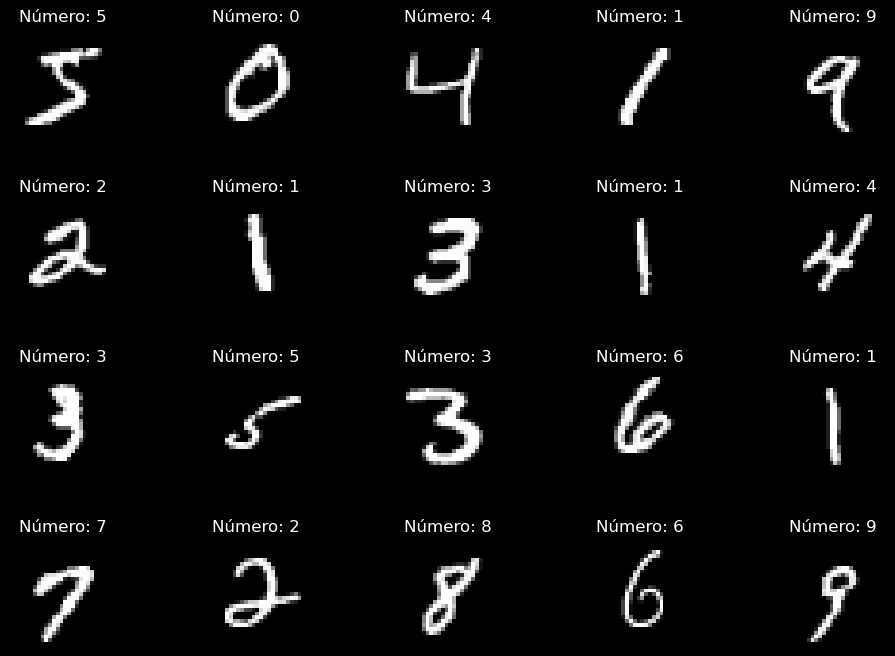

In [17]:
fig, axs = plt.subplots(4, 5, figsize=(12, 8))
fig.patch.set_facecolor('black')
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i], cmap="gray")
    ax.set_title(f"Número: {y_train[i]}", color="white")
    ax.axis("off")

fig.subplots_adjust(hspace=0.6)

plt.show()

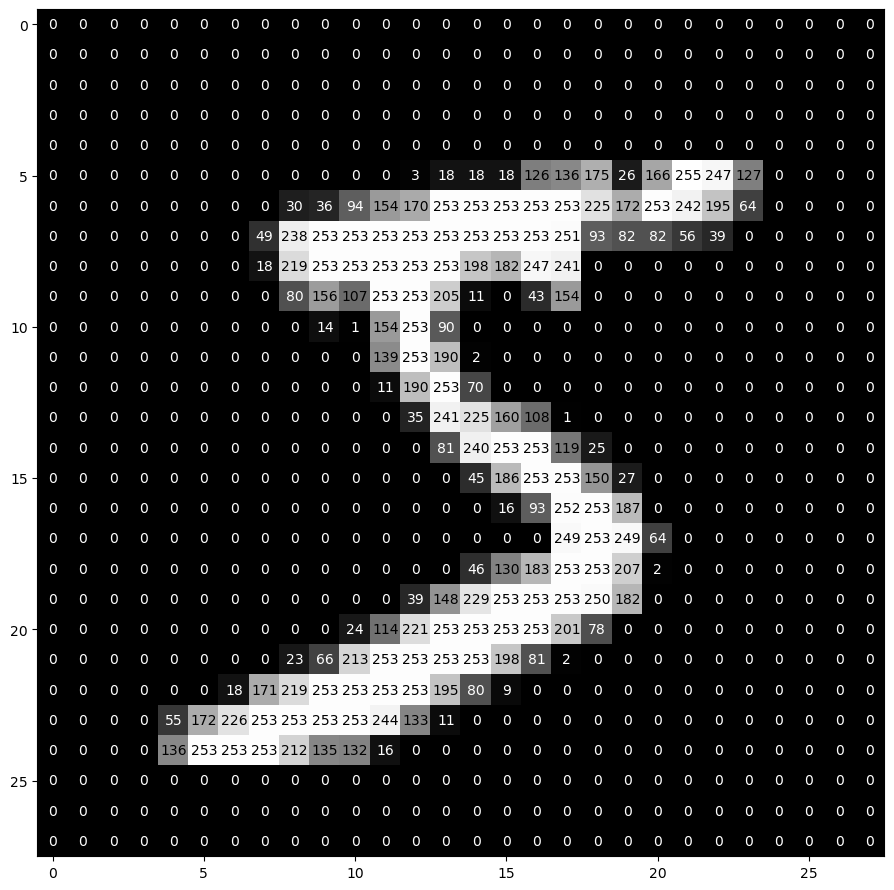

In [18]:
fig, ax = plt.subplots(figsize=(11, 11))


ax.imshow(x_train[0], cmap="gray")

for linha in range(28):
    for coluna in range(28):
        valor = x_train[0][linha][coluna]
        ax.annotate(
            str(valor),
            xy=(coluna, linha),
            color="black" if valor > 100 else "white",
            horizontalalignment="center",
            verticalalignment="center",
        )

plt.show()

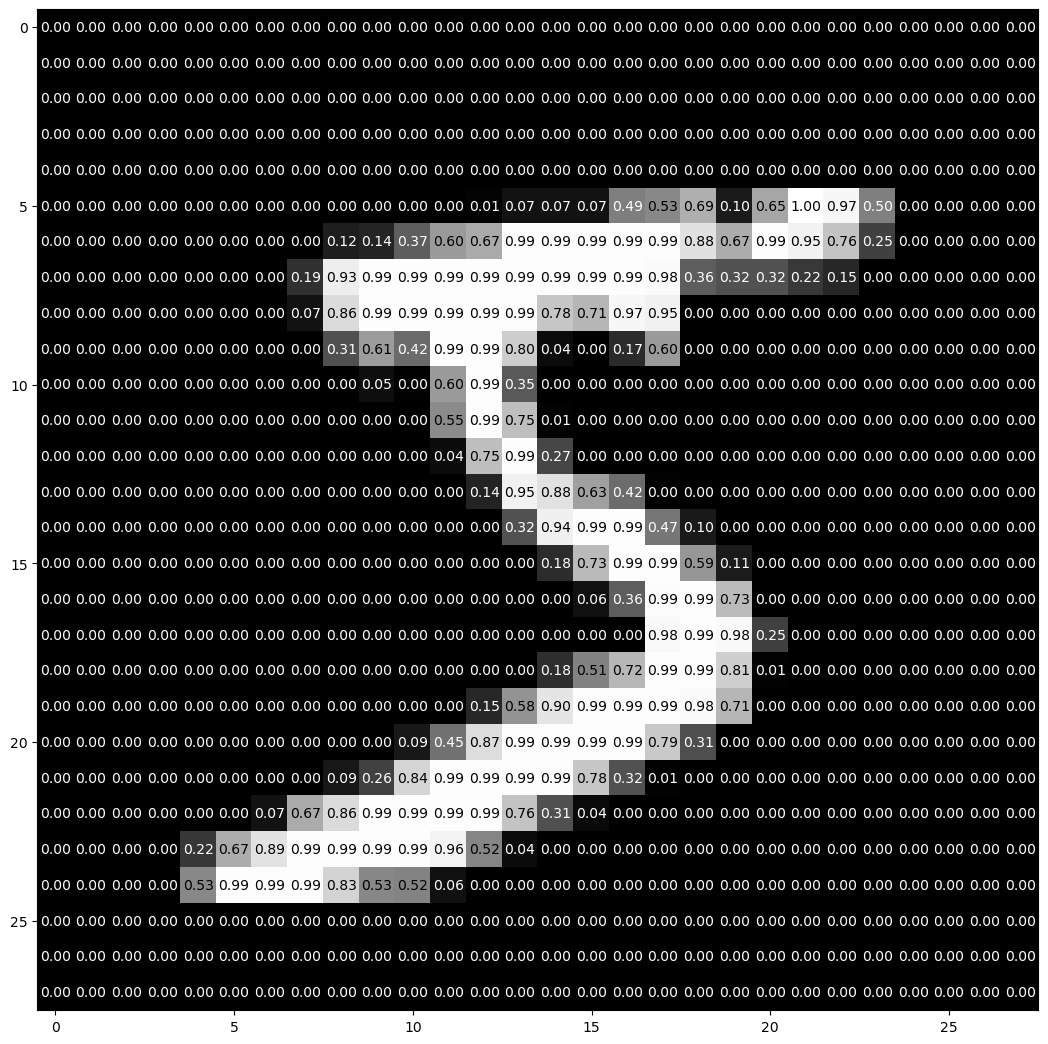

In [19]:
fig, ax = plt.subplots(figsize=(13, 13))


ax.imshow(x_train[0] / 255, cmap="gray")

for linha in range(28):
    for coluna in range(28):
        valor = x_train[0][linha][coluna] / 255
        ax.annotate(
            f"{valor:.2f}",
            xy=(coluna, linha),
            color="black" if valor > 0.5 else "white",
            horizontalalignment="center",
            verticalalignment="center",
        )

plt.show()

## Novo Modelo com Terceira Versão de CNN

### Arquitetura do Modelo

In [20]:
model = keras.models.Sequential()

model.add(keras.layers.InputLayer(input_shape=(28, 28, 1)))
model.add(keras.layers.Rescaling(scale=1./255))
model.add(keras.layers.RandomRotation(0.1))
model.add(keras.layers.RandomTranslation(height_factor=0.1, width_factor=0.1))
model.add(keras.layers.RandomZoom(0.1))
model.add(keras.layers.Conv2D(64, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(128, (3, 3), activation="relu"))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.2))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 random_rotation (RandomRota  (None, 28, 28, 1)        0         
 tion)                                                           
                                                                 
 random_translation (RandomT  (None, 28, 28, 1)        0         
 ranslation)                                                     
                                                                 
 random_zoom (RandomZoom)    (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0

### Alterações Específicas

1. **Data Augmentation:**
   - As camadas `RandomRotation`, `RandomTranslation` e `RandomZoom` aumentam a variabilidade dos dados de entrada, melhorando a generalização do modelo.

2. **Manutenção de Dropout:**
   - Camadas de `Dropout` foram mantidas para combater overfitting.

3. **Total de Parâmetros:**
   - O modelo possui 106.506 parâmetros treináveis, o mesmo do segundo modelo CNN, mas com melhor robustez devido ao data augmentation.

---

## Configuração do Treinamento

### Configuração do Otimizador

In [21]:
optimizer = keras.optimizers.Adam(learning_rate=1E-3)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

- A taxa de aprendizado `1E-3` foi mantida para garantir atualizações eficientes nos pesos do modelo.

### Configuração do Treinamento com Early Stopping

In [22]:
early_stop = keras.callbacks.EarlyStopping(
    patience=5,
    verbose=1,
    min_delta=1E-4,
)

history = model.fit(
    x_train,
    y_train,
    epochs=300,
    batch_size=512,
    validation_split=0.2,
    callbacks=[early_stop],
)

Epoch 1/300
94/94 [==============================] - 69s 635ms/step - loss: 1.1864 - sparse_categorical_accuracy: 0.6146 - val_loss: 0.1901 - val_sparse_categorical_accuracy: 0.9455
Epoch 2/300
94/94 [==============================] - 57s 611ms/step - loss: 0.5067 - sparse_categorical_accuracy: 0.8416 - val_loss: 0.1383 - val_sparse_categorical_accuracy: 0.9589
Epoch 3/300
94/94 [==============================] - 59s 629ms/step - loss: 0.3955 - sparse_categorical_accuracy: 0.8778 - val_loss: 0.1189 - val_sparse_categorical_accuracy: 0.9643
Epoch 4/300
94/94 [==============================] - 59s 623ms/step - loss: 0.3462 - sparse_categorical_accuracy: 0.8941 - val_loss: 0.1019 - val_sparse_categorical_accuracy: 0.9693
Epoch 5/300
94/94 [==============================] - 59s 626ms/step - loss: 0.2986 - sparse_categorical_accuracy: 0.9094 - val_loss: 0.0933 - val_sparse_categorical_accuracy: 0.9712
Epoch 6/300
94/94 [==============================] - 60s 644ms/step - loss: 0.2651 - spars

### Justificativa para o Uso do Terceiro Modelo CNN

1. **Melhoria na Generalização:**
   - As técnicas de data augmentation permitem que o modelo lide melhor com variações nos dados de entrada, especialmente em imagens externas.

2. **Combate ao Overfitting:**
   - O uso combinado de data augmentation e dropout reduz os riscos de overfitting.

3. **Melhor Desempenho em Dados Externos:**
   - O modelo foi ajustado para melhorar o desempenho em dados fora do conjunto MNIST.

---


## Evaluate modelo Keras

In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 10s 33ms/step - loss: 0.0366 - sparse_categorical_accuracy: 0.9899


[0.03664164990186691, 0.9898999929428101]

## Resultados do Treinamento e Validação

### Evolução da Perda (Loss)


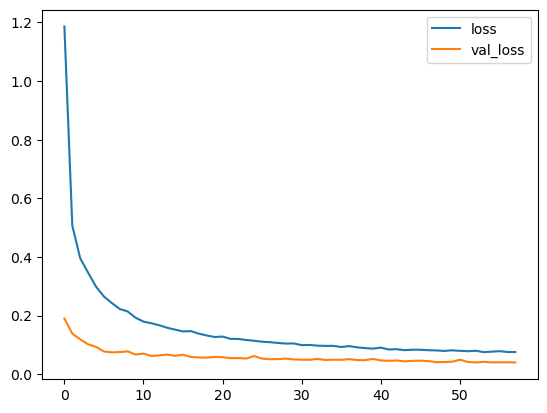

In [24]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

### Evolução da Acurácia

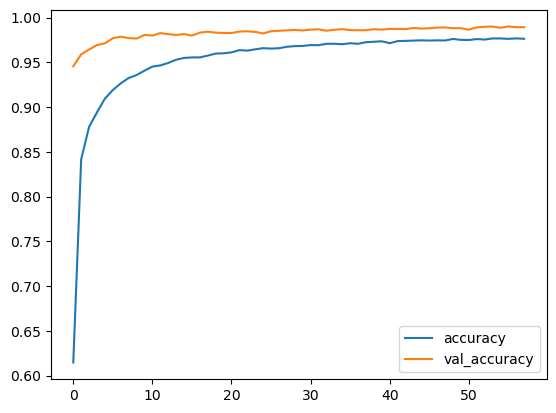

In [25]:
plt.plot(history.history["sparse_categorical_accuracy"], label="accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

- **Observações:**
  - A acurácia de validação mantém-se alta e próxima à de treinamento, mostrando excelente generalização.
  - A perda no conjunto de validação (`val_loss`) acompanha de perto a perda de treinamento, indicando ausência de overfitting.
---

In [26]:
x_test[0].shape

(28, 28)

In [27]:
model.predict(np.expand_dims(x_test[0], axis=0))[0]

1/1 [==============================] - 0s 188ms/step


array([4.60763028e-09, 1.31564157e-05, 2.94630299e-05, 8.43372709e-06,
       9.55730215e-08, 2.71589879e-08, 1.10551615e-14, 9.99947190e-01,
       5.61191484e-08, 1.53196936e-06], dtype=float32)

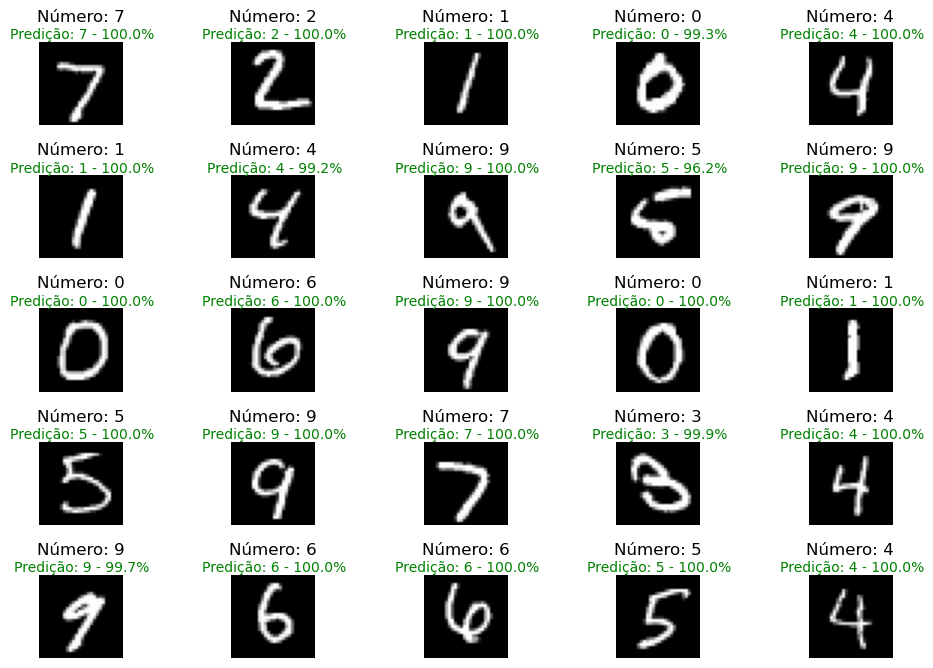

In [28]:
fig, axs = plt.subplots(5, 5, figsize=(12, 8))

for i, ax in enumerate(axs.flat):
    ax.imshow(x_test[i], cmap="gray")
    ax.set_title(f"Número: {y_test[i]}", pad=15)
    ax.axis("off")
    pred = model.predict(np.expand_dims(x_test[i], axis=0), verbose=0)[0]
    ax.text(
        14,
        -3,
        f"Predição: {pred.argmax()} - {pred.max():.1%}",
        color="green" if pred.argmax() == y_test[i] else "red",
        verticalalignment="center",
        horizontalalignment="center",

        
    )

fig.subplots_adjust(hspace=0.6)

plt.show()

## Resultados com Dados Externos

### Predições em Imagens Fora do MNIST

- **Análise:**
  - O modelo apresentou o melhor desempenho até agora, com alta taxa de acertos em imagens externas, graças às melhorias na arquitetura e ao uso de data augmentation.

---

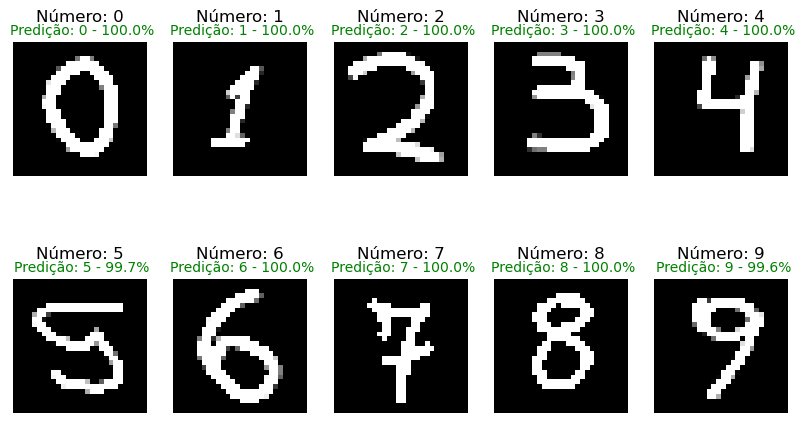

In [29]:
# Caminho para a pasta test_images dentro de PASTA_DADOS
test_images_dir = PASTA_DADOS / "test_images"


if not test_images_dir.exists():
    raise FileNotFoundError(f"A pasta {test_images_dir} não foi encontrada!")

fig, axs = plt.subplots(2, 5, figsize=(10, 5))

all_pred = {}


for i, (img, ax) in enumerate(zip(sorted(test_images_dir.glob("*.png")), axs.flat)):
    name = img.name.split(".")[0]
    img = keras.preprocessing.image.load_img(
        img, target_size=(28, 28), color_mode="grayscale"
    )

    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = 255 - img_array  # Inverta as cores da imagem
    img_array = tf.expand_dims(img_array, 0)


    pred = model.predict(img_array, verbose=0)
    all_pred[name] = pred


    ax.imshow(img_array[0], cmap="gray")
    ax.set_title(f"Número: {name}", pad=15)
    ax.axis("off")
    ax.text(
        14,
        -3,
        f"Predição: {pred.argmax()} - {pred.max():.1%}",
        color="green" if str(pred.argmax()) == name else "red",
        verticalalignment="center",
        horizontalalignment="center",
    )

fig.subplots_adjust(hspace=0.6)

plt.show()


In [30]:
all_pred["9"]

array([[1.3771952e-11, 1.4868445e-14, 2.8806835e-06, 2.5570327e-05,
        1.2920063e-08, 1.4112941e-07, 4.7864527e-19, 3.9673634e-03,
        1.8802849e-06, 9.9600214e-01]], dtype=float32)

In [31]:
all_pred["3"]

array([[1.0135662e-15, 4.4674215e-17, 2.2185197e-06, 9.9999774e-01,
        2.3126063e-18, 8.4604584e-13, 8.2981170e-24, 4.1964091e-10,
        8.0235341e-13, 5.8387903e-16]], dtype=float32)